# import package

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# open google drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Read in train data

In [ ]:
train_path = "/content/drive/My Drive/market analysis data/train.csv"
train_data = pd.read_csv(train_path)
train_data.head()


,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4


In [ ]:
train_data.user_id.unique()

array([    43,    102,    177, ..., 127696, 127807, 127880])

# read in user_data

In [ ]:
user_path = "/content/drive/My Drive/market analysis data/users.csv"
user_data = pd.read_csv(user_path)
user_data.domain.unique()

array(['@gmail.com', 'other', '@yahoo.com', '@hotmail.com', '@ymail.com',
       '@live.com', '@icloud.com', '@outlook.com', '@rocketmail.com',
       '@qq.com', '@163.com'], dtype=object)

# combine train data and user_data by user_id

In [ ]:
attr_1 = []
attr_2 = []
attr_3 = []
age = []
domain = []

user_atr1 = user_data.attr_1.tolist()
user_atr2 = user_data.attr_2.tolist()
user_atr3 = user_data.attr_3.tolist()
user_age = user_data.age.tolist()
user_domain = user_data.domain.tolist()

dt = {}

for j in range(user_data.shape[0]):
  if int(user_data.user_id.iloc[j]) not in dt:
    dt[int(user_data.user_id.iloc[j])] = [user_atr1[j], user_atr2[j], user_atr3[j], user_age[j], user_domain[j]] 
# dictionary is built up


for i in range(train_data.shape[0]):
  
  attr_1.append((dt[int(train_data.user_id.iloc[i])])[0])
  attr_2.append(dt[int(train_data.user_id.iloc[i])][1])
  attr_3.append(dt[int(train_data.user_id.iloc[i])][2])
  age.append(dt[int(train_data.user_id.iloc[i])][3])
  domain.append(dt[int(train_data.user_id.iloc[i])][4])

  if i % 1000 == 0:
    print(i)
            
train_data = train_data.join(pd.DataFrame({"attr_1":attr_1,
                              "attr_2":attr_2,
                              "attr_3":attr_3,
                              "age":age,
                              "domain":domain}))

print()
train_data.to_csv("new_train_data")

In [ ]:
new_train_data = pd.read_csv("/content/new_train_data")
new_train_data.head()

,Unnamed: 0,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id,attr_1,attr_2,attr_3,age,domain
0,0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0,1.0,1.0,2.0,47.0,@gmail.com
1,1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1,1.0,1.0,2.0,25.0,@hotmail.com
2,2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2,NaN,1.0,0.0,NaN,@yahoo.com
3,3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3,1.0,1.0,2.0,24.0,@yahoo.com
4,4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4,NaN,1.0,0.0,NaN,@hotmail.com


In [ ]:
test_path = "/content/drive/My Drive/market analysis data/test.csv"
test_data = pd.read_csv(test_path)
test_data.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0
1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1
2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2
3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3
4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4


In [ ]:
for i in range(test_data.shape[0]):
  attr_1.append((dt[int(test_data.user_id.iloc[i])])[0])
  attr_2.append(dt[int(test_data.user_id.iloc[i])][1])
  attr_3.append(dt[int(test_data.user_id.iloc[i])][2])
  age.append(dt[int(test_data.user_id.iloc[i])][3])
  domain.append(dt[int(test_data.user_id.iloc[i])][4])

  if i % 1000 == 0:
    print(i) 
            
test_data = test_data.join(pd.DataFrame({"attr_1":attr_1,
                              "attr_2":attr_2,
                              "attr_3":attr_3,
                              "age":age,
                              "domain":domain}))

print()
test_data.to_csv("new_test_data")

In [ ]:
new_test_data_path = "/content/new_test_data"
new_test_data = pd.read_csv(new_test_data_path)
new_test_data.head()

,Unnamed: 0,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id,attr_1,attr_2,attr_3,age,domain
0,0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0,1.0,1.0,2.0,47.0,@gmail.com
1,1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1,1.0,1.0,2.0,25.0,@hotmail.com
2,2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2,NaN,1.0,0.0,NaN,@yahoo.com
3,3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3,1.0,1.0,2.0,24.0,@yahoo.com
4,4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4,NaN,1.0,0.0,NaN,@hotmail.com


## get dummy variable (new_train & new_test)

In [ ]:
new_train_data = new_train_data.join(pd.get_dummies(new_train_data.domain))
new_train_data = new_train_data.join(pd.get_dummies(new_train_data.country_code))

def string_to_integer(str):
  if str == "Never open":
    return 1000
  else:
    return int(str)

def string_to_integer_2(str):
  if str == "Never checkout":
    return 2000
  else:
    return int(str)

new_train_data.last_open_day = new_train_data.last_open_day.apply(string_to_integer)
new_train_data.last_checkout_day = new_train_data.last_checkout_day.apply(string_to_integer_2)
clean_train_data.last_login_day = clean_train_data.last_login_day.apply(int)

new_train_data.head()

,Unnamed: 0,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id,attr_1,attr_2,attr_3,age,domain,@163.com,@gmail.com,@hotmail.com,@icloud.com,@live.com,@outlook.com,@qq.com,@rocketmail.com,@yahoo.com,@ymail.com,other,1,2,3,4,5,6,7
0,0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0,1.0,1.0,2.0,47.0,@gmail.com,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1,1.0,1.0,2.0,25.0,@hotmail.com,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2,NaN,1.0,0.0,NaN,@yahoo.com,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3,1.0,1.0,2.0,24.0,@yahoo.com,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4,NaN,1.0,0.0,NaN,@hotmail.com,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
new_test_data = new_test_data.join(pd.get_dummies(new_test_data.domain))
new_test_data = new_test_data.join(pd.get_dummies(new_test_data.country_code))
def string_to_integer(str):
  if str == "Never open":
    return 1000
  else:
    return int(str)

def string_to_integer_2(str):
  if str == "Never checkout":
    return 2000
  else:
    return int(str)

def string_to_integer_3(str):
  if str == "Never login":
    return 2000
  else:
    return int(str)

new_test_data.last_login_day = new_test_data.last_login_day.apply(string_to_integer_3)

new_test_data.last_open_day = new_test_data.last_open_day.apply(string_to_integer)
new_test_data.last_checkout_day = new_test_data.last_checkout_day.apply(string_to_integer_2)
new_test_data.head()

,Unnamed: 0,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id,attr_1,attr_2,attr_3,age,domain,@163.com,@gmail.com,@hotmail.com,@icloud.com,@live.com,@outlook.com,@qq.com,@rocketmail.com,@yahoo.com,@ymail.com,other,1,2,3,4,5,6,7
0,0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0,1.0,1.0,2.0,47.0,@gmail.com,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1,1.0,1.0,2.0,25.0,@hotmail.com,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2,NaN,1.0,0.0,NaN,@yahoo.com,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3,1.0,1.0,2.0,24.0,@yahoo.com,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4,NaN,1.0,0.0,NaN,@hotmail.com,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## NA value:
* drop all NA values row
* drop specific columns + drop NA values rows
* fill NA with specific value

## method 1: drop all NA values row

In [ ]:
# method 1:
# drop all NA values rows 
# clean_train_data = new_train_data.dropna()
# clean_train_data.shape

(45164, 42)

## method 2: drop train and test data's specific columns

train/test data drop columns --- domain, grass_date, country_code, open_flag, user_id, row_id, 'Unnamed: 0'


In [ ]:
clean_train_data = clean_train_data.drop("domain", axis=1) 
clean_train_data.drop("grass_date", axis=1, inplace=True)
clean_train_data.drop("country_code", axis=1,inplace=True)

clean_train_data.drop("open_flag", axis=1, inplace=True)
clean_train_data.drop("user_id", axis=1, inplace=True)
clean_train_data.drop("row_id", axis=1, inplace=True)
clean_train_data.drop('Unnamed: 0',axis=1,inplace=True)

train_flag = clean_train_data.open_flag

In [ ]:
clean_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45164 entries, 0 to 73537
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   subject_line_length          45164 non-null  int64  
 1   last_open_day                45164 non-null  int64  
 2   last_login_day               45164 non-null  int64  
 3   last_checkout_day            45164 non-null  int64  
 4   open_count_last_10_days      45164 non-null  int64  
 5   open_count_last_30_days      45164 non-null  int64  
 6   open_count_last_60_days      45164 non-null  int64  
 7   login_count_last_10_days     45164 non-null  int64  
 8   login_count_last_30_days     45164 non-null  int64  
 9   login_count_last_60_days     45164 non-null  int64  
 10  checkout_count_last_10_days  45164 non-null  int64  
 11  checkout_count_last_30_days  45164 non-null  int64  
 12  checkout_count_last_60_days  45164 non-null  int64  
 13  attr_1          

In [ ]:
clean_test_data = new_test_data.drop("domain", axis=1)
clean_test_data.drop("grass_date", axis=1, inplace=True)
clean_test_data.drop("country_code", axis=1,inplace=True)
clean_test_data.drop("user_id", axis=1, inplace=True)
clean_test_data.drop("row_id", axis=1, inplace=True)
clean_test_data.drop("Unnamed: 0",axis=1, inplace=True)

# standardize clear_train_data (without NA values)

In [ ]:
std_data = (clean_train_data - clean_train_data.mean()) / (clean_train_data.std())  # standardization can boost model accuracy

In [ ]:
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(std_data,train_flag, test_size=0.2, stratify=train_flag,
                                                                random_state=42)

In [ ]:
NUM_FEATURES = 3
model = linear_model.LogisticRegression()
rfe_stand = RFE(model, NUM_FEATURES)
fit_stand = rfe_stand.fit(std_data, clean_train_data_openFlag)

print("Std Model Feature Ranking:", fit_stand.ranking_)

# calculate the score for the selected features
score_stand = rfe_stand.score(std_data,clean_train_data_openFlag)
print("Standardized Model Score with selected features is: %f (%f)" % (score_stand.mean(), score_stand.std()))

print()
feature_names = np.array(std_data.columns)
print('Most important features (RFE): %s'% feature_names[rfe_stand.support_])

Std Model Feature Ranking: [31 30 29 14  1  2  1  6 17  5 21 12 11 20 32 10 15 24 26 27 25 33 22 23
 28 16 18 13  7  9  8  1  3 19  4]
Standardized Model Score with selected features is: 0.882628 (0.000000)

Most important features (RFE): ['open_count_last_10_days' 'open_count_last_60_days' 4]


# model
  ---Logistic Regression (standardized features)

In [ ]:
Xstd_train.drop("attr_1",axis=1,inplace=True)
Xstd_train.drop("attr_2",axis=1,inplace=True)
Xstd_train.drop("age",axis=1,inplace=True)

clean_test_data.drop("attr_1",axis=1,inplace=True)
clean_test_data.drop("attr_2",axis=1,inplace=True)
clean_test_data.drop("age",axis=1,inplace=True)


In [ ]:
Xstd_test.drop("attr_1",axis=1,inplace=True)
Xstd_test.drop("attr_2",axis=1,inplace=True)
Xstd_test.drop("age",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Setup the hyperparameter grid, (not scaled data)
param_grid = {'C': np.logspace(-5, 8, 15)}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()
# Instantiate the RandomizedSearchCV object:
logreg_cv_std = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

# Fit it to the standardized data
logreg_cv_std.fit(Xstd_train, ystd_train)

# Print the tuned parameters 
print("Tuned Logistic Regression Parameters with standardized features: {}".format(logreg_cv_std.best_params_)) 

Tuned Logistic Regression Parameters with standardized features: {'C': 3.727593720314938}


Accuracy: 0.8874128196612421

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7631
           1       0.74      0.42      0.54      1402

    accuracy                           0.89      9033
   macro avg       0.82      0.70      0.74      9033
weighted avg       0.88      0.89      0.87      9033


Average 5-Fold CV Score: 0.8867 , Standard deviation: 0.0036


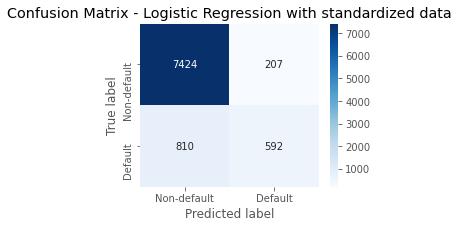

In [ ]:
LRS = LogisticRegression(C=3.73, random_state=0)
LRS.fit(Xstd_train, ystd_train)
y_pred = LRS.predict(Xstd_test)
print('Accuracy:', metrics.accuracy_score(y_pred,ystd_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LRS, std_data, train_flag, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(ystd_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(ystd_test,LRS.predict(Xstd_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression with standardized data");

In [ ]:
prediction = LRS.predict(clean_test_data)

In [ ]:
clean_test_data.describe()

,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,attr_3,@163.com,@gmail.com,@hotmail.com,@icloud.com,@live.com,@outlook.com,@qq.com,@rocketmail.com,@yahoo.com,@ymail.com,other,1,2,3,4,5,6,7
count,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000
mean,42.212703,163.805753,53.618456,462.736895,0.774272,2.441880,5.323530,8.978899,26.289459,50.713882,1.124674,3.219385,5.933893,1.073575,0.001608,0.854797,0.039807,0.005950,0.002198,0.003591,0.004377,0.000804,0.068108,0.002448,0.016312,0.291781,0.184545,0.256441,0.081222,0.079650,0.062641,0.043720
std,12.276136,334.727036,295.739008,785.758315,1.752984,4.786883,9.053473,13.975840,38.572656,73.289199,3.500704,8.197445,14.233715,1.036980,0.040068,0.352308,0.195507,0.076905,0.046828,0.059820,0.066017,0.028344,0.251933,0.049414,0.126675,0.454586,0.387932,0.436672,0.273178,0.270753,0.242318,0.204473
min,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,7.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,24.000000,8.000000,35.000000,0.000000,0.000000,2.000000,4.000000,13.000000,25.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,58.000000,23.000000,301.000000,1.000000,3.000000,6.000000,13.000000,36.000000,70.000000,1.000000,3.000000,7.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,79.000000,1000.000000,18165.000000,2000.000000,30.000000,79.000000,120.000000,329.000000,746.000000,1300.000000,252.000000,404.000000,609.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
clean_test_data.isnull().sum()

subject_line_length            0
last_open_day                  0
last_login_day                 0
last_checkout_day              0
open_count_last_10_days        0
open_count_last_30_days        0
open_count_last_60_days        0
login_count_last_10_days       0
login_count_last_30_days       0
login_count_last_60_days       0
checkout_count_last_10_days    0
checkout_count_last_30_days    0
checkout_count_last_60_days    0
attr_3                         0
@163.com                       0
@gmail.com                     0
@hotmail.com                   0
@icloud.com                    0
@live.com                      0
@outlook.com                   0
@qq.com                        0
@rocketmail.com                0
@yahoo.com                     0
@ymail.com                     0
other                          0
1                              0
2                              0
3                              0
4                              0
5                              0
6         

In [ ]:
for i in range(len(prediction)):
  print(prediction[i])
print()
print(len(prediction))

In [ ]:
test_data.shape

(55970, 22)

In [ ]:
output = pd.DataFrame({"row_id":list(range(0,len(prediction))),"open_flag":prediction})

output.to_csv("output.csv")



In [ ]:
a = new_test_data.user_id.tolist()
b = x.user_id.tolist()
for i in range(len(a)):
  if a[i] != :
    print(False)


In [ ]:
clean_test_data

,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,attr_3,@163.com,@gmail.com,@hotmail.com,@icloud.com,@live.com,@outlook.com,@qq.com,@rocketmail.com,@yahoo.com,@ymail.com,other,1,2,3,4,5,6,7
0,35,27,2,13,2,3,4,10,34,134,0,6,18,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,35,7,5,383,1,1,1,5,5,5,0,0,0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,25,34,1,3,0,0,0,13,19,38,2,2,2,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,36,63,5,5,0,0,0,43,110,173,2,5,5,2.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,23,6,5,54,0,0,0,4,12,39,0,0,2,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,53,1000,4,8,0,0,0,0,0,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
55966,53,59,802,1207,0,0,1,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
55967,43,1000,7,2000,0,0,0,0,0,0,0,0,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
55968,43,5,5,6,2,5,14,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
